Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/drive/MyDrive/Bangla drama sentiment analysis/' 
stopwords_list = '/content/drive/MyDrive/Bangla drama sentiment analysis/stopwords-bn.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
from nltk.corpus import stopwords
import re
import pandas as pd
data = pd.read_excel('/content/drive/MyDrive/Bangla drama sentiment analysis/Combined Bangla Corpus_Sakib(updated).xlsx')
data.text=data.text.astype(str)
data = data.dropna()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

In [ ]:
len(data.classes.value_counts())

6

In [ ]:
data.classes.unique()

array(['joy', 'surprise', 'sadness', 'disgust', 'fear', 'anger'],
      dtype=object)

In [ ]:
#Checking for NULLs and removing them
data.isnull().sum()

text       0
classes    0
dtype: int64

In [ ]:
#Dropping duplicates
data.shape


(13436, 2)

In [ ]:
data.drop_duplicates(inplace=True)


In [ ]:
data.shape

(13072, 2)

In [ ]:
data.dropna(thresh=2)

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,joy
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,surprise
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",joy
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",joy
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,surprise
...,...,...
13431,Bravo বললে ছোট করা হবে ৷ সুতরাং হাজারো সালাম আ...,joy
13432,কি যে করেন না ম্যাজিস্ট্রেট স্যার? প্রথমটুক পড়...,joy
13433,আপনারা এই সত্যের পথে অবিচল থাকুন দেশবাসী আপনাদ...,joy
13434,এগিয়ে যান। আপনাদের দিকেই তাকিয়ে বাংলাদেশ।,joy


In [ ]:
#Preprocessing the text
print(data['text'].apply(lambda x: len(str(x).split(' '))).sum())

268298


In [ ]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = '/content/drive/MyDrive/Bangla drama sentiment analysis/stopwords-bn.txt'

In [ ]:
'''
def clean_text(text):

    data['text'] = data['text'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in STOPWORDS))
    return text

    
data['text'] = data['text'].apply(clean_text)
'''

'\ndef clean_text(text):\n\n    data[\'text\'] = data[\'text\'].apply(lambda x: " ".join(x.lower() for x in str(x).split()                                     if x not in STOPWORDS))\n    return text\n\n    \ndata[\'text\'] = data[\'text\'].apply(clean_text)\n'

In [ ]:
print(data['text'].apply(lambda x: len(x.split(' '))).sum())

268298


In [ ]:
print("Total Reviews:",len(data),
      "\nTotal Joy Reviews:",len(data[data.classes =='joy']),
      "\nTotal Sadness Reviews:",len(data[data.classes=='sadness']),
      "\nTotal Anger Reviews:",len(data[data.classes =='anger']),
      "\nTotal Disgust Reviews:",len(data[data.classes =='disgust']),
      "\nTotal Fear Reviews:",len(data[data.classes =='fear']),
      "\nTotal Surprised Reviews:",len(data[data.classes =='surprise'])
      )

Total Reviews: 13072 
Total Joy Reviews: 3290 
Total Sadness Reviews: 2622 
Total Anger Reviews: 2422 
Total Disgust Reviews: 2049 
Total Fear Reviews: 1348 
Total Surprised Reviews: 1341


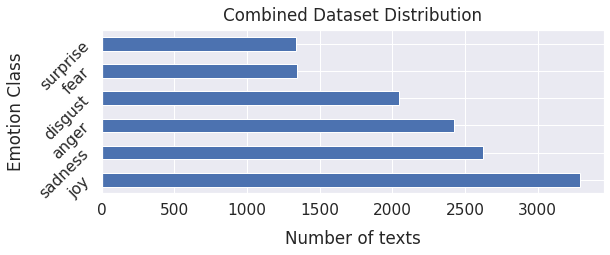

In [ ]:
#dataset visualization
sns.set(font_scale=1.4)
data['classes'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of texts", labelpad=12)
plt.ylabel("Emotion Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Combined Dataset Distribution", y=1.02);

In [ ]:
#Train Test split
from sklearn.model_selection import train_test_split
X = data.text
y = data.classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((9150,), (3922,), (9150,), (3922,))

In [ ]:
#Applying Logistic Regression
#Applying Naive Bayes
#Applying XGBoost

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")

Accuracy is : 0.4370219275879653


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
naivebayes.fit(X_train, y_train)

y_pred = naivebayes.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.38832228454869966


In [ ]:
from xgboost import XGBClassifier

xgboost = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', XGBClassifier()),
              ])
xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')

accuracy 0.3931667516573177


In [ ]:
from transformers import BertForSequenceClassification
from torch.utils.data import TensorDataset
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer
import torch
from tqdm.notebook import tqdm
from transformers import BertTokenizer

In [ ]:
possible_labels = data.classes.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'joy': 0, 'surprise': 1, 'sadness': 2, 'disgust': 3, 'fear': 4, 'anger': 5}

In [ ]:
#droping a column and replace it with another
data['classes'] = data.classes.replace(label_dict)

In [ ]:
from sklearn.model_selection import train_test_split

train, eval = train_test_split(data,test_size=0.3)
train.head()

,text,classes
7256,মুহামদ ইউনুছ মুহামদ ইউনুছ বাইনচোদ এখানে বঙ্গবন...,5
11183,প্রশাসন যদি তনু হত্যার বিচার করতে না এগিয়ে আসে...,2
10124,এটার বিপরীতটা যদি হতো? ধরুন ছেলেকে না পেয়ে ছেল...,2
1415,রহিংগা মুসলমানদের উপর রহম কর বডার খোলে দাও,2
10561,আমরা এমনটিই চেয়েছিলাম পুলিশ ভাইদের নিকট।কিন্তু..,2


In [ ]:
eval.head()

,text,classes
5403,বাচ্চাগুলো অসহায়ের মতো তাকাচ্ছে আর আমাদের দুই...,2
2506,আর যদি তা না হয় তাহলে বুঝা যাবে যে আমার রুম থে...,3
9509,শালা মুসলিমের বাচ্চা নয় কাফেরের বাচ্চা ইমরান স...,5
7980,"কথাগুলো তো ভালোই লাগলো, এই কথাগুলো তো ফেসবুক আ...",2
3792,ক্যারিয়ারের সবচেয়ে কঠিন সময়টা পার করছেন মোস্তা...,2


In [ ]:
data.head()

,text,classes
0,এই নাটকটি হচ্ছে ১৯৯৩ সালের। কিন্তু তখন ইউটিউব ...,0
1,২০২১ সালে যারা “ কোথাও কেউ নেই ” দেখতে আসে - ত...,1
2,"বাংলাদেশের ইতিহাসে সর্বশ্রেষ্ঠ নাটক ""কোথাও কেউ...",0
3,"এতো সুন্দর নাটক আগে কখনো দেখা হয় নাই,2021 সালে...",0
4,কখনো চিন্তাও করিনি জন্মের ৭-৮ বছর আগের নাটক দে...,1


In [ ]:
#Multi-lingual BERT
import pandas as pd

from simpletransformers.classification import ClassificationModel
from sklearn.metrics import f1_score, accuracy_score

# Create a ClassificationModel

model = ClassificationModel("bert", "bert-base-multilingual-uncased", num_labels=6, use_cuda=False, args={
    'max_seq_length': 64,
    'train_batch_size': 16,
    'gradient_accumulation_steps': 1,
    'eval_batch_size': 16,
    'num_train_epochs': 2,
    'weight_decay': 0,
    'learning_rate': 2e-5,
    'adam_epsilon': 1e-8,
    'reprocess_input_data': True,
    'use_cached_eval_features': False,
    'num_train_epochs': 2,
    'silent': True,
    "warmup_ratio": 0.06,
    "warmup_steps": 0,
    "max_grad_norm": 1.0,

    "logging_steps": 50,
    "save_steps": 2000,

    "overwrite_output_dir": True,
    "reprocess_input_data": False,
    "evaluate_during_training": False,

})

# Train the model
model.train_model(train)

# Evaluate the model

def f1_multiclass(classes, text):
    return f1_score(classes, text, average='micro')
    
result, model_outputs, wrong_predictions = model.eval_model(eval, f1=f1_multiclass, acc=accuracy_score)


Some weights of the model checkpoint at bert-base-multilingual-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model 

In [ ]:
print(result)

{'mcc': 0.2956293294754146, 'f1': 0.4334523202447731, 'acc': 0.4334523202447731, 'eval_loss': 1.4478365461516187}
